In [41]:
from __future__ import division
from __future__ import print_function  
import warnings
import pandas as pd
import gsp_support as gsp
import matplotlib.pyplot as plt
import numpy as np

import datetime

# importing libraries for the plot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
output_folder = 'FINAL/Descriptive statistics/'
input_folder = 'FINAL/daily/'

In [19]:
daily_logs = pd.read_csv(input_folder+'daily_logs2_30min.csv')
daily_logs.index = pd.to_datetime(daily_logs['Date'],format = '%Y-%m-%d')

In [28]:
j = 'FINAL/av_data/'

total = pd.read_csv(j+'3 min disaggregated result FINAL with removed meters Mar-Oct.csv')
total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')

In [37]:
car = []
volt = []
hrs = []
met = []
date_ = []
watt = []
con = []

grouped = total.groupby('meter')

for name, group in grouped:
    sub = grouped.get_group(name)
    date_list = list(np.unique(sub.index.date))
    
    for date in date_list:
        date_.append(date)
        met.append(name)
        s = sub.loc[sub.index.date==date]
        
        
    # hrs
        ac_on = s.loc[s['ac_on']==1]
        w = ac_on['ac_power'].mean()
        watt.append(w)
        h = (ac_on.shape[0]*3)/60
        hrs.append(h)
        c_on = s.loc[s['final_compressor']==1]
        if ac_on.shape[0]>0:
            car.append((c_on.shape[0]/ac_on.shape[0])*100)
        else:
            car.append(np.nan)
        con.append((h*w)/1000)
        
        volt.append(c_on['voltage'].mean())
        

In [38]:
daily_logs = pd.DataFrame({'Meter':met, 'Date':date_, 'ac_usage_hrs':hrs,'Avg CAR':car, 'Avg voltage when compressor on':volt,'Avg AC Wattage':watt,'daily AC consumption':con})

In [43]:
daily_logs.to_csv(output_folder+'daily_logs.csv')

In [51]:
daily_logs['month'] = daily_logs['Date'].dt.to_period('M')

In [59]:
daily_logs['meter_code'] = daily_logs['Meter'].str[0]

In [61]:
# daily_logs.groupby(['Meter','month'])
daily_logs.groupby(['meter_code','month']).describe()

ac_usage_hrs                                          \
                          count      mean       std  min     25%    50%   
meter_code month                                                          
B          2019-07        111.0  6.045946  4.655721  0.0  2.0250  5.750   
           2019-08        274.0  7.389599  4.336884  0.0  4.7000  7.375   
           2019-09        325.0  5.642769  5.129965  0.0  0.7500  5.050   
           2019-10        372.0  0.957258  1.708060  0.0  0.0000  0.000   
           2020-03        386.0  0.711010  1.152829  0.0  0.0000  0.000   
           2020-04        371.0  1.461051  2.869264  0.0  0.0000  0.400   
           2020-05        356.0  4.516854  4.985514  0.0  0.0000  2.650   
           2020-06        384.0  8.001042  5.350406  0.0  3.5000  7.650   
           2020-07        367.0  7.069346  5.054045  0.0  3.0750  7.000   
           2020-08        363.0  7.142287  5.190148  0.0  2.8750  6.850   
           2020-09        284.0  7.405106  5.956300  0.0  2.0000  6.800   
           2020-10        340.0  3.160147  4.586620  0.0  0.0000  0.975   
M          2019-05        317.0  6.708517  4.228756  0.0  3.8500  6.450   
           2019-06        416.0  9.355649  4.522281  0.0  6.3500  9.850   
           2019-07        316.0  8.329114  4.665244  0.0  4.7500  8.700   
           2019-08        340.0  8.152206  5.106698  0.0  3.8750  8.650   
           2019-09        392.0  6.783929  5.040340  0.0  2.3000  6.475   
           2019-10        337.0  2.169733  3.294122  0.0  0.0000  0.700   
           2020-03        229.0  0.280131  0.957867  0.0  0.0000  0.000   
           2020-04        267.0  1.493071  2.319199  0.0  0.0000  0.500   
           2020-05        237.0  4.360127  3.987924  0.0  0.6000  4.050   
           2020-06        233.0  8.236266  5.050579  0.0  4.4000  8.300   
           2020-07        282.0  8.900000  5.120196  0.0  5.0625  9.050   
           2020-08        226.0  6.745796  4.961800  0.0  2.8500  6.000   
           2020-09        240.0  7.199583  4.599445  0.0  3.5250  7.125   
           2020-10        292.0  2.212500  3.137837  0.0  0.0000  0.800   

                                   Avg CAR             ... Avg AC Wattage  \
                        75%    max   count       mean  ...            75%   
meter_code month                                       ...                  
B          2019-07   9.0250  18.45    98.0  83.771105  ...    1249.369089   
           2019-08  10.1375  22.35   253.0  83.683979  ...    1317.641046   
           2019-09   9.6000  23.65   252.0  84.058879  ...    1313.690457   
           2019-10   1.2500   9.45   162.0  88.782483  ...    1451.840247   
           2020-03   1.0875   8.35   171.0  86.563119  ...    1550.950935   
           2020-04   1.5750  20.75   197.0  86.752319  ...    1406.282051   
           2020-05   8.2375  23.85   256.0  88.357465  ...    1491.984979   
           2020-06  12.1500  20.70   343.0  86.366423  ...    1472.119441   
           2020-07  10.3250  20.65   319.0  82.514031  ...    1378.713642   
           2020-08  10.5500  22.90   312.0  83.862201  ...    1336.730114   
           2020-09  11.7000  23.10   236.0  85.479672  ...    1473.879741   
           2020-10   4.5000  22.75   210.0  85.832259  ...    1376.345358   
M          2019-05   9.2000  23.15   298.0  93.834893  ...    1645.736808   
           2019-06  12.2250  20.50   400.0  94.271344  ...    1741.491200   
           2019-07  11.7125  20.00   300.0  92.120124  ...    1559.466657   
           2019-08  11.8500  22.65   311.0  89.117966  ...    1532.424399   
           2019-09  10.3625  20.95   355.0  87.805761  ...    1477.385637   
           2019-10   2.9000  21.60   218.0  88.487398  ...    1592.588480   
           2020-03   0.0000  10.35    51.0  91.584923  ...    1562.111351   
           2020-04   2.0250  12.50   145.0  92.678939  ...    1476.929972   
           2020-05   6.7000  17.55   189.0  94.339059  ...    1337.09195

In [50]:

daily_logs['Date'] = pd.to_datetime(daily_logs['Date'])

In [ ]:
# total number of hours for 2019 (7,8,9 ) per AC
# total number of hours  for 2020 (all months) per AC

In [64]:
daily_logs['year'] = daily_logs['Date'].dt.year

In [83]:
df20 = daily_logs.loc[daily_logs['year']==2020]

In [84]:
df20

,Meter,Date,ac_usage_hrs,Avg CAR,Avg voltage when compressor on,Avg AC Wattage,daily AC consumption,month,meter_code,year
97,BR06,2020-03-01,3.45,57.971014,252.536000,841.546765,2.903336,2020-03,B,2020
98,BR06,2020-03-02,2.20,63.636364,248.119643,1061.025284,2.334256,2020-03,B,2020
99,BR06,2020-03-03,1.65,60.606061,250.517000,1337.028321,2.206097,2020-03,B,2020
100,BR06,2020-03-04,4.10,76.829268,250.235238,743.133591,3.046848,2020-03,B,2020
101,BR06,2020-03-05,3.10,64.516129,252.142250,1164.752457,3.610733,2020-03,B,2020
...,...,...,...,...,...,...,...,...,...,...
8052,MH45,2020-10-27,0.00,NaN,NaN,NaN,NaN,2020-10,M,2020
8053,MH45,2020-10-28,0.00,NaN,NaN,NaN,NaN,2020-10,M,2020
8054,MH45,2020-10-29,0.00,NaN,NaN,NaN,NaN,2020-10,M,2020
8055,MH45,2020-10-30,0.00,NaN,NaN,NaN,NaN,2020-10,M,2020


In [69]:
daily_logs['month'] =daily_logs['month'].apply(str)

In [73]:
df19_m = df19.loc[df19['meter_code']=='M']
df19_b = df19.loc[df19['meter_code']=='B']

In [85]:
df20_m = df20.loc[df20['meter_code']=='M']
df20_b = df20.loc[df20['meter_code']=='B']

In [95]:
b = df20.groupby('Meter').apply(func)

79.95
138.1
223.86785714285713
341.41785714285714
464.0307603686636
637.4017281105992
700.1132665721376
786.6293956043957
20.279999999999998
20.279999999999998
215.01529411764707
575.3773630831643
925.9273630831642
1306.1473630831642
3.048387096774193
6.598387096774193
60.0626728110599
281.8626728110599
484.99170506912435
725.7658986175115
969.5158986175115
996.9029953917051
14.467741935483874
22.467741935483872
92.29532814238041
124.99532814238042
127.70500556173525
127.70500556173525
145.3588517155814
152.61691623171043
11.19642857142857
140.0964285714286
371.61366995073894
691.0636699507389
890.2636699507389
1108.8636699507388
1437.3636699507388
1591.5249602733195
51.82258064516129
86.2725806451613
182.43329493087558
311.8332949308756
439.91394009216594
562.8139400921659
695.533940092166
739.133940092166
0.967741935483871
4.174638487208009
83.05394883203562
291.25394883203563
514.9474972191324
678.5442714126808
728.7942714126808
733.7297552836485
3.2
7.5
130.82142857142856
555.26373

In [101]:
df = pd.DataFrame(a.append(b, ignore_index = ))

In [106]:
df = pd.concat([a,b],axis=1)

In [108]:
df.columns = ['2019','2020']

In [88]:
a.mean()

1043.3263908381698

In [81]:
a.mean()

467.5242180511989

In [78]:
a.mean()

687.67207150974

In [75]:
def func(df):
    grouped = df.groupby('month')
    s = 0
    for name,group in grouped:
        sub = grouped.get_group(name)
        avg = sub['ac_usage_hrs'].mean()
        summ = avg*30 
        s = s+summ
        print(s)
    return s

In [109]:
df.to_csv('FINAL/Descriptive statistics/hist_tot_num_hrs.csv')

In [110]:
df

,2019,2020
Meter,,
BR06,255.626437,786.629396
BR07,742.498718,1306.147363
BR08,607.042857,996.902995
BR11,71.081028,152.616916
BR12,616.682882,1591.524960
BR18,649.902217,739.133940
BR22,33.833333,733.729755
BR23,798.989286,555.263736
BR24,610.681319,1376.093714


In [117]:
aug = daily_logs.loc[daily_logs['month']=='2019-08']

In [119]:
aug['kWh/hr'] = aug['daily AC consumption']/daily_logs['ac_usage_hrs']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E1FBF1808>]],
      dtype=object)

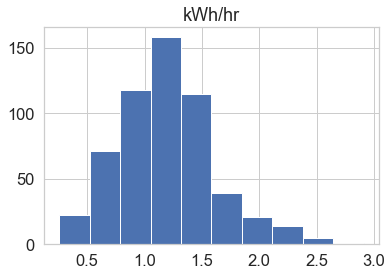

In [121]:
aug.hist(column='kWh/hr')

In [125]:
dd = aug.groupby('Meter').mean()

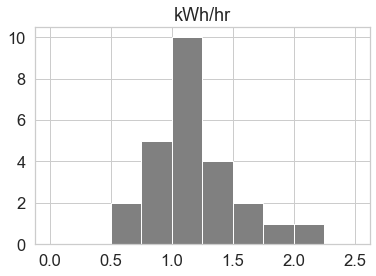

In [139]:
pl = dd.hist(column = 'kWh/hr', range=[0, 2.5], facecolor='gray', align='mid')

In [138]:
dd.to_csv('FINAL/Descriptive statistics/hist_kWhr.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'figure'